<a href="https://colab.research.google.com/github/Pratt33/ML_Algorithms_From_Scratch/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Objective:

1. The goal is to predict a target variable (y) based on an independent variable (X) using regression techniques.

2. The dataset exhibits a non-linear pattern, making polynomial regression a suitable model for better accuracy.

# Problem Statement:

1. Given a set of data points with noise, the objective is to determine the best regression model that accurately

2. captures the relationship between X and y while considering overfitting and underfitting trade-offs.

# Business Constraints:

- Model should generalize well to unseen data.

- Model complexity should be balanced to avoid overfitting.

- Computational efficiency should be considered for scalability.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
# Generating synthetic dataset
np.random.seed(42)
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

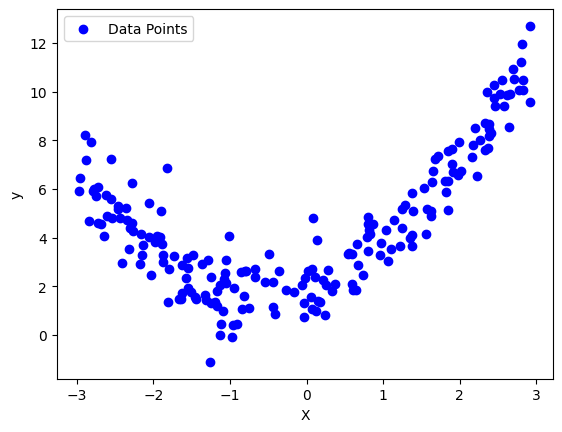

In [3]:
# Visualizing data
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [4]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
# Applying Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
print(f"Linear Regression R2 Score: {r2_score(y_test, y_pred):.4f}")

Linear Regression R2 Score: 0.3445


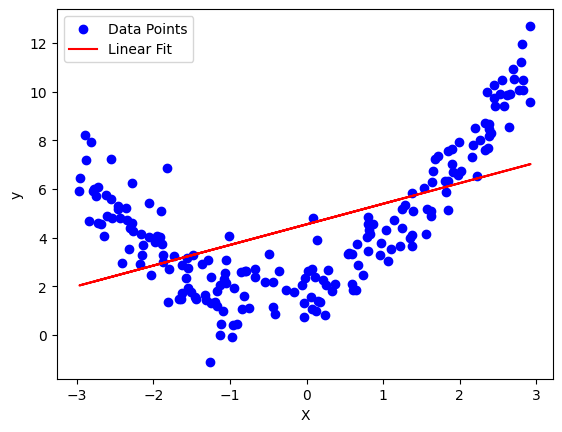

In [6]:
# Visualizing Linear Regression Fit
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_train, linear_reg.predict(X_train), color='red', label='Linear Fit')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [7]:
# Applying Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [8]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_trans, y_train)
y_poly_pred = poly_reg.predict(X_test_trans)
print(f"Polynomial Regression (degree=2) R2 Score: {r2_score(y_test, y_poly_pred):.4f}")

Polynomial Regression (degree=2) R2 Score: 0.8414


In [9]:
# Visualizing Polynomial Regression Fit
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = poly_reg.predict(X_new_poly)

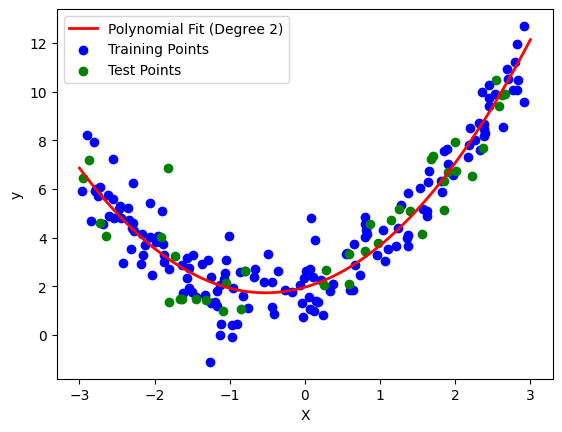

In [10]:
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Polynomial Fit (Degree 2)')
plt.scatter(X_train, y_train, color='blue', label='Training Points')
plt.scatter(X_test, y_test, color='green', label='Test Points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [11]:
# Function to test different polynomial degrees
def polynomial_regression(degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_pipeline = Pipeline([
        ('poly_features', poly_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg)
    ])

    polynomial_pipeline.fit(X_train, y_train)
    y_pred = polynomial_pipeline.predict(X_new)

    plt.plot(X_new, y_pred, 'r', linewidth=2, label=f'Polynomial Fit (Degree {degree})')
    plt.scatter(X_train, y_train, color='blue', label='Training Points')
    plt.scatter(X_test, y_test, color='green', label='Test Points')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

    print(f"Polynomial Regression (degree={degree}) R2 Score: {r2_score(y_test, polynomial_pipeline.predict(X_test)):.4f}")

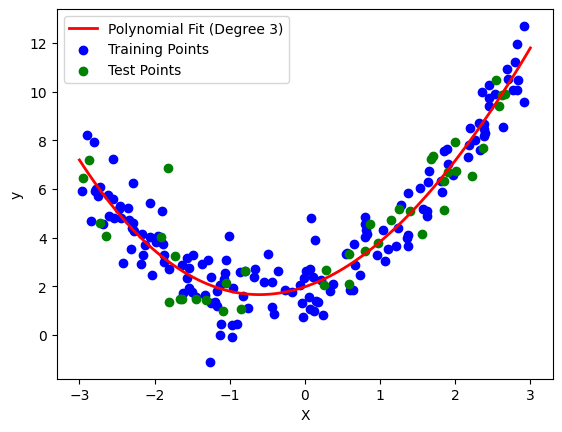

Polynomial Regression (degree=3) R2 Score: 0.8439


In [12]:
# Testing higher polynomial degrees to analyze overfitting and underfitting
polynomial_regression(3)  # More flexible model

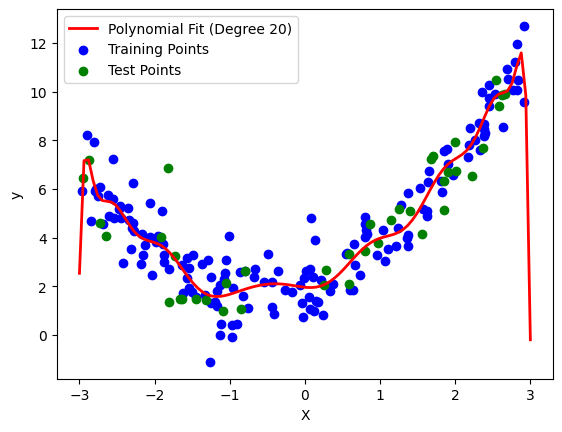

Polynomial Regression (degree=20) R2 Score: 0.8605


In [13]:
polynomial_regression(20) # Overfitting model

# Conclusion:

- Linear Regression does not capture the non-linearity in the data well.

- Polynomial Regression with degree=2 significantly improves model performance.

- Higher-degree polynomials (degree 10+) tend to overfit the training data.

- A trade-off must be made between model complexity and generalization.